# Estimating Airbnb listing price in Seattle

<br> The objective of this project is to highlight listing features that should be used to estimate Airbnb listing prices. <br> We apply the workflow and evaluate data for the city of Seattle.

<br> Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

## The Data
<br> Working with listing.csv file
<br> The file has 74 columns
<br> Here I start working on specific columns listed below and define them in: col_list_listings
<br> In other words, I discard empty columns, url, names, etc.

In [2]:
col_list_listings = ['id', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text'
                     , 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'has_availability'
                     , 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews'
                     , 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy'
                     , 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication'
                     , 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']

## Load Data

In [3]:
city='Seattle'
data_fldr='../Airbnb_data/'

df=pd.read_csv(data_fldr + city +'/listings.csv', usecols=col_list_listings)

In [4]:
df.set_index('id');

In [5]:
print(df.shape)

(4686, 28)


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4686.0,3.359331e+07,1.710985e+07,2318.00,19386474.75,37381447.50,49910973.00,53904424.00
accommodates,4686.0,3.886470e+00,2.449298e+00,0.00,2.00,4.00,5.00,16.00
bedrooms,4061.0,1.692687e+00,1.019571e+00,1.00,1.00,1.00,2.00,8.00
beds,4579.0,2.069011e+00,1.447055e+00,1.00,1.00,2.00,3.00,16.00
minimum_nights,4686.0,1.377166e+01,2.060527e+01,1.00,2.00,3.00,30.00,365.00
maximum_nights,4686.0,5.603229e+02,5.210497e+02,1.00,31.00,365.00,1125.00,10000.00
availability_30,4686.0,1.234913e+01,1.044991e+01,0.00,1.00,11.00,21.00,30.00
availability_60,4686.0,3.135467e+01,2.102977e+01,0.00,12.00,35.00,49.00,60.00
availability_90,4686.0,5.229834e+01,3.075673e+01,0.00,25.00,61.00,78.00,90.00
availability_365,4686.0,1.940982e+02,1.241390e+02,0.00,79.00,179.00,321.00,365.00


## Exploratory Data Analysis
<br> Analysing Important Columns
<br> Making necessary changes or modifications in important columns

### Price
Column name = price

In [7]:
print(df['price'].dtypes)
print(df['price'][0:10])

object
0    $333.00
1     $99.00
2     $62.00
3    $185.00
4    $145.00
5    $130.00
6    $143.00
7     $81.00
8     $67.00
9    $195.00
Name: price, dtype: object


In [8]:
# removing '$' and '.' from df.price and converting it to numeric values
# however, there should be a smarter approach for converting this column to numeric values
df.price = df.price.str.replace('\$|,', '').astype('float64')

C:\Users\siava\AppData\Local\Temp/ipykernel_9480/14964403.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.price = df.price.str.replace('\$|,', '').astype('float64')


In [9]:
df.price.describe()

count    4686.000000
mean      158.667947
std       146.632730
min         0.000000
25%        86.000000
50%       125.000000
75%       188.750000
max      3887.000000
Name: price, dtype: float64

In [10]:
# droping invalid rows with listing price less than or equal to zero
df.drop(df[df.price<=0].index,inplace=True)
print(len(df))

4683


#### 
Very few listings (count=7) have a price greater than $1,000

In [11]:
df[df.price>1000].price.count()

7

#### Necessary Transformation for Price Data
<br> Data for the price column has a log-normal distribution
<br> I will use log10 and transform this column to convert it into a Gaussian distribution for modeling purposes
<br> note that I am using log-scale on the x_axis for the histogram (axes[1]) 
<br> I used it for conveying the message and showing the necessity for a log transformation

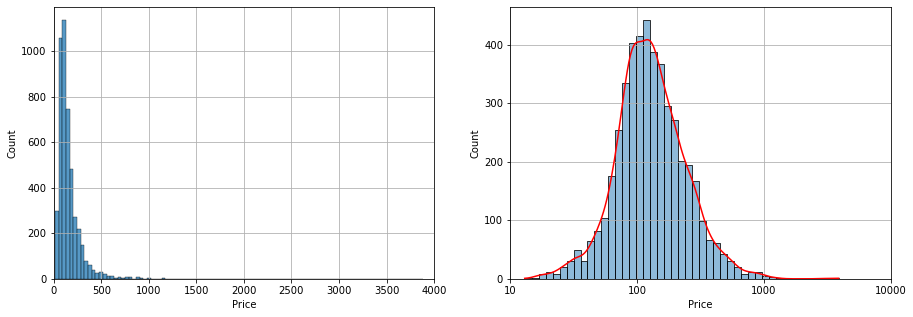

In [12]:
fig , axes = plt.subplots(1, 2, figsize=(15,5))

axes0 = sns.histplot(data=df, x=df['price'], bins=100, kde=False, ax=axes[0])
axes0.set_xlabel('Price')
axes0.grid(), axes0.set(xlim=(0, 4000));

axes1 = sns.histplot(data=df, x=np.log10(df['price']), bins=45, kde=True, ax=axes[1])
axes1.lines[0].set_color('red')
axes1.set_xlabel('Price')
axes1.set_xticks(range(1,5));
axes1.set_xticklabels([10,100,1000,10000]);
axes1.grid(), axes1.set(xlim=(1, 4));

### Room Type
column name = room_type

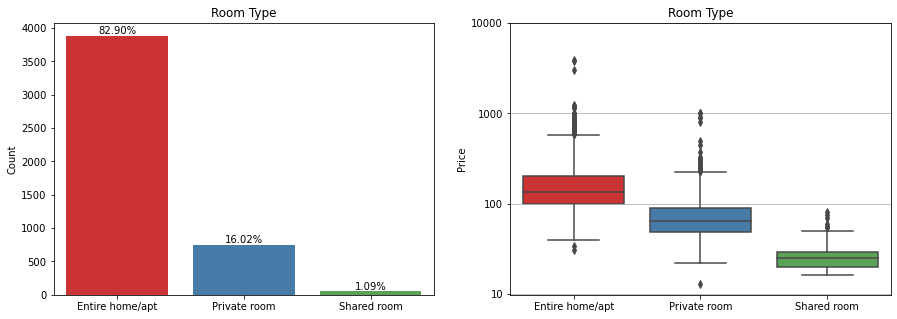

In [13]:
fig , axes = plt.subplots(1, 2, figsize=(15,5))

# bar chart showing the total number of listings in each category
axes0 = sns.countplot(data=df, x=df.room_type, palette='Set1', ax=axes[0])
axes0.set_title('Room Type')
axes0.set(xlabel=None)
axes0.set_ylabel('Count')
# adding the percentage of listings in each category
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.2f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')
# box plot showing the distribution of price for each category
axes1 = sns.boxplot(data=df, x=df.room_type, y=np.log10(df.price), palette='Set1', ax=axes[1])
axes1.set_title('Room Type')
axes1.set(xlabel=None)
axes1.set_ylabel('Price')
# modifying y-axis tick labels to show Price on a log10 scale
axes1.set_yticks(range(1,5));
axes1.set_yticklabels([10,100,1000,10000]);
axes1.grid(axis='y')

### Accommodates
column name = accommodates

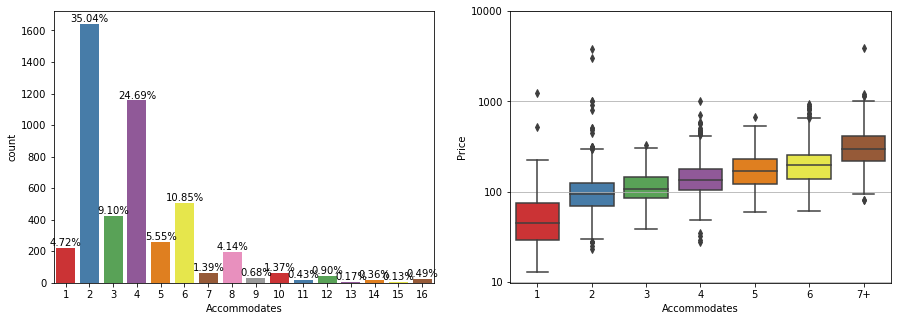

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# bar chart showing the total number of listings in each category
axes0 = sns.countplot(data=df, x=df.accommodates, palette='Set1', ax=axes[0])
# adding the percentage of listings in each category
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.2f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom', rotation=0)
axes0.set_xlabel('Accommodates')

# box plot showing the distribution of price for each category (number of 'accommodates')
# combining all accommodates=>7 into one category '7+' 
cutoff = 7
axes1 = sns.boxplot(data=df, x=df['accommodates'].where(df['accommodates'] <= cutoff, cutoff), y=np.log10(df.price)
                    , palette='Set1', ax=axes[1])
axes1.set_xlabel('Accommodates')
axes1.set_xticklabels(list(range(1,cutoff,1)) + [f'{cutoff}+'])
axes1.set_ylabel('Price')
# modifying y-axis tick labels to show Price on a log10 scale
axes1.set_yticks(range(1,5));
axes1.set_yticklabels([10,100,1000,10000]);
axes1.grid(axis='y')

<br> As we will observe later in the study, <I>accommodates</I> is one of the main features in the dataset
<br> In some data sets the accommodation is zero, and I drop the listings where accommodates==0

In [15]:
df.drop(df[df.accommodates==0].index,inplace=True)
print(len(df))

4683


### Beds and Bedrooms
<br> Column name = bedrooms
<br> Column name = beds

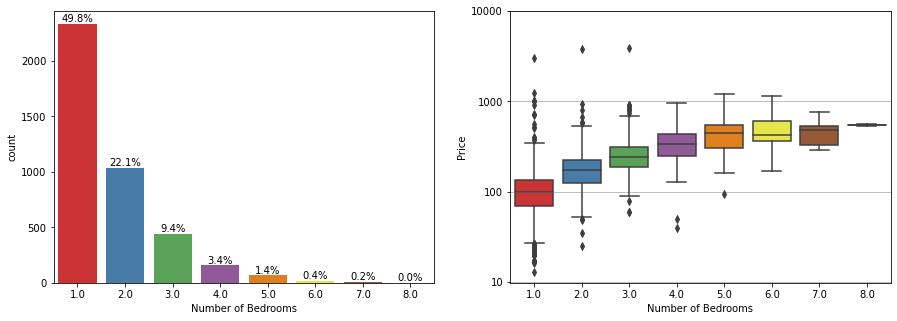

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# bar chart showing the total number of listings in each category (Number of Bedrooms)
axes0 = sns.countplot(data=df, x=df.bedrooms, palette='Set1', ax=axes[0])
# adding the percentage of listings in each category
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom', rotation=0)
axes0.set_xlabel('Number of Bedrooms')

# box plot showing the distribution of price for each category
axes1 = sns.boxplot(data=df, x=df['bedrooms'], y=np.log10(df.price), palette='Set1', ax=axes[1])
axes1.set_xlabel('Number of Bedrooms')
axes1.set_ylabel('Price')
# modifying y-axis tick labels to show Price on a log10 scale
axes1.set_yticks(range(1,5));
axes1.set_yticklabels([10,100,1000,10000]);
axes1.grid(axis='y')

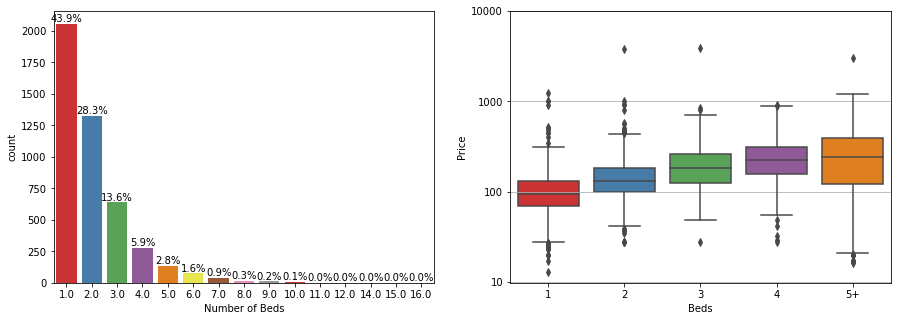

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# bar chart showing the total number of listings in each category (number of Beds)
axes0 = sns.countplot(data=df, x=df.beds, palette='Set1', ax=axes[0])
# adding the percentage of listings in each category
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom', rotation=0)
axes0.set_xlabel('Number of Beds')

# box plot showing the distribution of price for each category
# combining all beds=>5 into one category '5+' 
cutoff = 5
axes1 = sns.boxplot(data=df, x=df['beds'].where(df['beds'] <= cutoff, cutoff), y=np.log10(df.price)
                    , palette='Set1', ax=axes[1])
axes1.set_xlabel('Beds')
axes1.set_xticklabels(list(range(1,cutoff,1)) + [f'{cutoff}+'])
axes1.set_ylabel('Price')
# modifying y-axis tick labels to show Price using a log axis
axes1.set_yticks(range(1,5));
axes1.set_yticklabels([10,100,1000,10000]);
axes1.grid(axis='y')

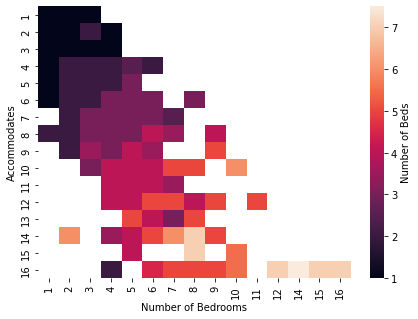

In [18]:
# using heat map to reveal the inherent relationship between <i>Accommodates</i>, <i>Bedrooms</i>, and <i>Beds</i>
heatmap_data = df[['accommodates', 'beds', 'bedrooms']]
data_pivoted = pd.pivot_table(data=df, values=['bedrooms'], index=['accommodates'], columns=['beds'], aggfunc='median')

fig, axes = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(data_pivoted, cbar_kws={'label': 'Number of Beds'})
axes.set_ylabel('Accommodates');
axes.set_xlabel('Number of Bedrooms');
axes.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]);

In [19]:
print('Number of missing values in beds: ', df.beds.isna().sum())
print('Number of missing values in bedrooms: ', df.bedrooms.isna().sum())

Number of missing values in beds:  104
Number of missing values in bedrooms:  622


In [20]:
# filling missing values in: beds and bedrooms
df['beds'].fillna(df.groupby(['accommodates','room_type'])['beds'].transform('mean').transform('round'), inplace=True)
df['beds'].fillna((df['accommodates']/2).apply(np.ceil), inplace=True)
df['bedrooms'].fillna(df.groupby(['beds','room_type'])['bedrooms'].transform('mean').transform('round'), inplace=True)
df['bedrooms'].fillna((df['accommodates']/2).apply(np.ceil), inplace=True)

### Bathrooms
<br> Column name = bathroom_text

<br> bathroom_text has lots of unique items
<br> will convert it into two columns: 1) if it is shared or private, and 2) the number of bathrooms for the property

In [21]:
df.bathrooms_text.unique()

array(['2.5 baths', '1 bath', '3 shared baths', '1 private bath',
       '1.5 baths', '4 shared baths', '2 baths', '1 shared bath',
       '3 baths', '1.5 shared baths', '3.5 baths', 'Shared half-bath',
       '2 shared baths', '4 baths', 'Half-bath', '3.5 shared baths',
       '6 baths', '4.5 baths', '0 baths', '0 shared baths',
       'Private half-bath', '16 shared baths', nan, '2.5 shared baths'],
      dtype=object)

In [22]:
df.bathrooms_text.isna().sum()

1

In [23]:
print('Number of listings with a shared bath: ', np.nansum(df.bathrooms_text.str.contains('shared')))

Number of listings with a shared bath:  458


In [24]:
# creating a new column, 1: if bath is shared, 0: not shared or nan
df['bath_is_shared'] = pd.get_dummies(df.bathrooms_text.str.contains('shared'), drop_first=True)
# I use 0 for nan for simplicity, one could have used df.room_type to improve the estimations
df['bath_is_shared'].fillna(0, inplace=True)

In [25]:
sum(df['bath_is_shared'])

458

In [26]:
# extracting the numerical values from bathrooms_text
df['bathroom_numbers'] = df.bathrooms_text.str.extract('([0-9][,.]*[0-9]*)')

# extracting 'half' from bathrooms_text and assigning 0.5
df['bathroom_numbers'][df.bathrooms_text.str.contains('half', na=False, regex=False)]=0.5

df['bathroom_numbers'] = pd.to_numeric(df['bathroom_numbers'])
df.drop(columns=['bathrooms_text'], inplace=True)

C:\Users\siava\AppData\Local\Temp/ipykernel_9480/110679144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathroom_numbers'][df.bathrooms_text.str.contains('half', na=False, regex=False)]=0.5


<br> filling possibble missing values with 1 (a property should have a bathroom)

In [27]:
df['bathroom_numbers'].fillna(1, inplace=True)

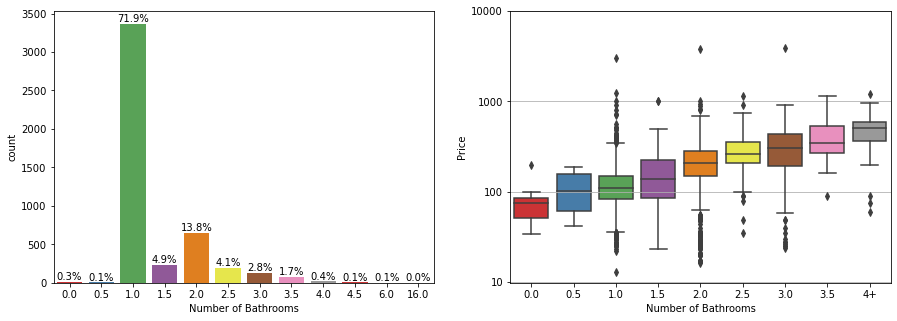

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# bar chart showing the total number of listings in each category
axes0 = sns.countplot(data=df, x=df.bathroom_numbers, palette='Set1', ax=axes[0])
# adding the percentage of listings in each category
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom', rotation=0)
axes0.set_xlabel('Number of Bathrooms')

# box plot showing the distribution of price for each category
# combining all accommodates=>7 into one category '4+' 
cutoff = 4
axes1 = sns.boxplot(data=df, x=df['bathroom_numbers'].where(df['bathroom_numbers'] <= cutoff, cutoff), y=np.log10(df.price)
                    , palette='Set1', ax=axes[1])
axes1.set_xlabel('Number of Bathrooms')
axes1.set_xticklabels(list(np.arange(0,cutoff,0.5)) + [f'{cutoff}+'])
axes1.set_ylabel('Price')
# modifying y-axis tick labels to show Price on a log10 scale
axes1.set_yticks(range(1,5));
axes1.set_yticklabels([10,100,1000,10000]);
axes1.grid(axis='y')

### Neighbourhood

In [29]:
print(df['neighbourhood_cleansed'].unique())
print(df['neighbourhood_cleansed'].isna().sum())

['Madrona' 'Wallingford' 'Georgetown' 'Fairmount Park' 'Whittier Heights'
 'Loyal Heights' 'Eastlake' 'Fremont' 'Alki' 'Green Lake'
 'Harrison/Denny-Blaine' 'Portage Bay' 'Lower Queen Anne' 'Phinney Ridge'
 'Crown Hill' 'Belltown' 'Lawton Park' 'Mid-Beacon Hill'
 'North Queen Anne' 'West Queen Anne' 'First Hill' 'Broadway'
 'North Admiral' 'Arbor Heights' 'International District'
 'North Beacon Hill' 'Greenwood' 'Cedar Park' 'Columbia City'
 'Mount Baker' 'Mann' 'Genesee' 'Central Business District' 'Ravenna'
 'University District' 'South Delridge' 'Atlantic' 'Broadview'
 'Maple Leaf' 'East Queen Anne' 'Pioneer Square' 'Highland Park'
 'West Woodland' 'Haller Lake' 'Madison Park' 'Fauntleroy' 'Westlake'
 'Matthews Beach' 'Minor' 'Leschi' 'Sunset Hill' 'Adams'
 'North Beach/Blue Ridge' 'Briarcliff' 'North Delridge' 'Bryant'
 'Seward Park' 'Bitter Lake' 'Riverview' 'Brighton' 'Interbay'
 'View Ridge' 'Stevens' 'Pike-Market' 'High Point' 'Yesler Terrace'
 'Harbor Island' 'Windermere' 'Rai

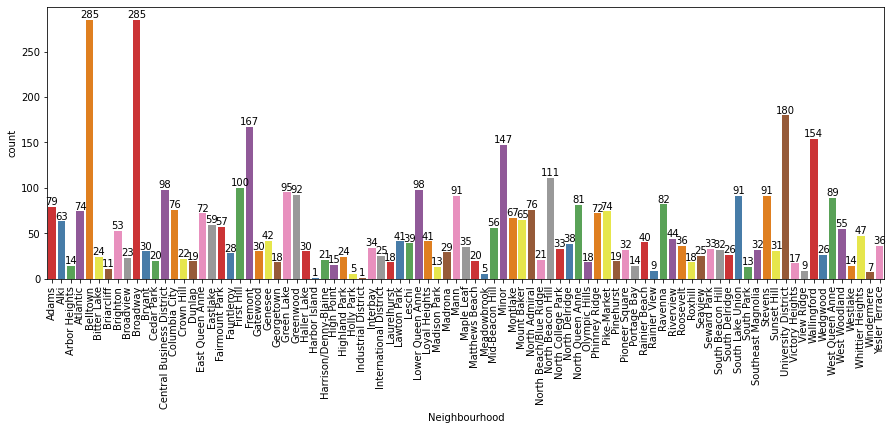

In [30]:
plt.figure(figsize=(15,5))

# use order to sort bars according to the average neghbourhood price
order = df.groupby(['neighbourhood_cleansed'])['price'].mean().index 
axes0 = sns.countplot(data=df, x=df.neighbourhood_cleansed, palette='Set1', order=order)
# adding the number of listings in each neighbourhood category
for p in axes0.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axes0.annotate('{:.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom', rotation=0)
#     axes0.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
#             ha='center', va='bottom', rotation=0)
axes0.set_xticklabels(axes0.get_xticklabels(),rotation = 90);
axes0.set_xlabel('Neighbourhood');

In [31]:
# creating a list of neighbourhoods where total number of listings are less than 5
# due to few listings in these neighbourhoods (some with 1 listing) the results may not be accurate
# these data will not be discarded, but a single dummy variable is used to represent these neighbourhoods
temp_df = pd.DataFrame(df.neighbourhood_cleansed.value_counts())
non_sig_neighbourhood = temp_df[temp_df.neighbourhood_cleansed<5].index
# it is note worthy that we could use OLS p-value to filter all non-significant neighbourhoods
# here we help removing some neighbourhoods with very few listings in advance

### Property Type
<br> Column name = property_type

In [32]:
print(df['property_type'].unique())
print(df['property_type'].isna().sum())

['Entire residential home' 'Entire guesthouse'
 'Private room in rental unit' 'Entire guest suite' 'Entire rental unit'
 'Private room in residential home' 'Entire condominium (condo)'
 'Private room in cottage' 'Private room in loft'
 'Private room in guesthouse' 'Private room' 'Private room in bungalow'
 'Private room in townhouse' 'Boat' 'Entire cottage' 'Entire townhouse'
 'Private room in guest suite' 'Private room in boat' 'Entire bungalow'
 'Private room in condominium (condo)' 'Entire loft'
 'Shared room in townhouse' 'Shared room' 'Private room in treehouse'
 'Entire villa' 'Entire cabin' 'Tent' 'Camper/RV' 'Tiny house' 'Houseboat'
 'Entire serviced apartment' 'Shared room in rental unit'
 'Room in boutique hotel' 'Shared room in loft'
 'Private room in earth house' 'Private room in tiny house'
 'Private room in serviced apartment' 'Private room in villa'
 'Private room in bed and breakfast' 'Room in aparthotel'
 'Private room in cabin' 'Shared room in residential home' 'Farm 

<br> property_type has lots of unique elements and room_type is descriptive enough.
<br> drop it for now
<br> property_type column may be useful for analysing outliers, etc.

In [33]:
df.drop(columns=['property_type'], inplace=True)

### Number of Reviews and Scores
<br> Column name = 
<br>&emsp;                    'number_of_reviews'
<br>&emsp;                    'number_of_reviews_ltm'
<br>&emsp;                    'number_of_reviews_l30d'
<br>
<br>&emsp;                    'review_scores_rating'
<br>&emsp;                    'review_scores_accuracy'
<br>&emsp;                    'review_scores_cleanliness'
<br>&emsp;                    'review_scores_checkin'
<br>&emsp;                    'review_scores_communication'
<br>&emsp;                    'review_scores_location'
<br>&emsp;                    'review_scores_value'

In [52]:
n_review_cols = ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month']

review_score_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness'
                     , 'review_scores_checkin', 'review_scores_communication', 'review_scores_location'
                     , 'review_scores_value']

In [53]:
print(np.sum(np.isnan(df[review_score_cols])))
print('\n')
print(np.sum(df[review_score_cols]==0))

review_scores_rating           722
review_scores_accuracy         728
review_scores_cleanliness      728
review_scores_checkin          728
review_scores_communication    728
review_scores_location         728
review_scores_value            728
dtype: int64


review_scores_rating           6
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64


In [54]:
# if the number_of_reviews is zero the columns listed below in review_cols are NaN
# fillna with 0 in review_cols, and MUST use/keep number_of_reviews to describe zero review_scores_*
for col in review_score_cols:
    df[col].fillna(0, inplace=True)

df['reviews_per_month'].fillna(0, inplace=True)

### Availability
<br> Column name = has_availability

In [55]:
print(df['has_availability'].unique())
print(df['has_availability'].isna().sum())

['t']
0


### Bookable
<br> Column name = instant_bookable

In [56]:
print(df['instant_bookable'].unique())
print(df['instant_bookable'].isna().sum())

['t' 'f']
0


## Get Dummies

In [57]:
df = pd.get_dummies(df, columns=['room_type'], prefix=['room_type'], prefix_sep='_',drop_first=True)

In [58]:
#Here we only use neighbourhoods with more than 5 listings, note that drop first is False to consider other neighbourhoods 
df = pd.get_dummies(df.replace(non_sig_neighbourhood, None), columns=['neighbourhood_cleansed']
                    , prefix=['neighbourhood'], prefix_sep='_',drop_first=False)

In [59]:
df = pd.get_dummies(df, columns=['has_availability'], prefix=['has_availability'], prefix_sep='_',drop_first=True)

In [60]:
df = pd.get_dummies(df, columns=['instant_bookable'], prefix=['bookable'], prefix_sep='_',drop_first=True)

## Principal Component Analysis and Low Variance Filter

In [61]:
from sklearn.decomposition import PCA

### Number of Reviews and Review Scores

In [62]:
# these two list of columns were defined before:

# n_review_cols = ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month']

# review_score_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness'
#                    , 'review_scores_checkin', 'review_scores_communication', 'review_scores_location'
#                    , 'review_scores_value']

<br> first we scale the review data (both list of columns for the number of reviews and the review scores)
<br> scaled data are implemented for calculating the correlation coefficients, and extracting the principal componenets

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[n_review_cols])
scaled_n_review_features = scaler.transform(df[n_review_cols])
scaler.fit(df[review_score_cols])
scaled_review_score_features = scaler.transform(df[review_score_cols])

<br> The following graphs show the calculated pairwise correlation of columns using Pearson as the method
<br>
<br> The results highlight very high correlation between different review scores,
<br> whereas, the correlation coefficient between the columns related to the number of reviews are not highly correlated (compared to review scores).

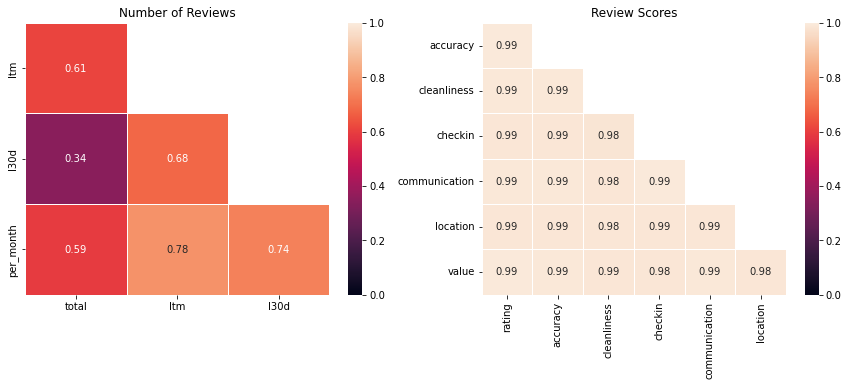

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

n_review_corr = pd.DataFrame(scaled_n_review_features).corr()
labels=['total', 'ltm', 'l30d', 'per_month']

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(n_review_corr, dtype=bool))
# adjust mask and df
mask = mask[1:, :-1]
n_review_corr = n_review_corr.iloc[1:,:-1].copy()

sns.heatmap(n_review_corr, mask=mask, annot=True, linewidths=.5, vmin=0, vmax=1
            , xticklabels=labels[:-1], yticklabels=labels[1:], ax=axes[0])
axes[0].title.set_text('Number of Reviews')

review_score_corr = pd.DataFrame(scaled_review_score_features).corr()
labels=[]
for txt in review_score_cols:
    labels.append(txt.replace('review_scores_', ''))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(review_score_corr, dtype=bool))
mask = mask[1:, :-1]
review_score_corr = review_score_corr.iloc[1:,:-1].copy()
sns.heatmap(review_score_corr,  mask=mask, annot=True, linewidths=.5, vmin=0, vmax=1
            , xticklabels=labels[:-1], yticklabels=labels[1:], ax=axes[1])
axes[1].title.set_text('Review Scores')

<br> Here, Principal Component Analysis (PCA) is used to reduce the dimentionality
<br> As we saw in the previous figure, different <i>Review Scores</i> are highly correlated and reducing the dimensionality is necessary to mitigate collinearity
<br> i.e., different <i>Review Scores</i> columns are not independent from one another, and a single PCA component captures 99% of the variance

In [65]:
pca = PCA(n_components=1)
# using scaled features (obtained from MinMaxScaler, not the raw review scores) as an input for PCA
pca.fit(scaled_review_score_features)

print('Explained Variance Ratio:', pca.explained_variance_ratio_)

review_pca = pca.transform(scaled_review_score_features)
print('Original number of columns: ', df[review_score_cols].shape[1])
print('Principal Components: ', review_pca.shape[1])

Explained Variance Ratio: [0.98990195]
Original number of columns:  7
Principal Components:  1


In [66]:
df.drop(columns=review_score_cols, inplace=True)
df['review_pca'] = review_pca

<br> testing the same approach for columns related to number of reviews

In [89]:
pca = PCA(n_components=3)
# using scaled features (obtained from MinMaxScaler) as an input for PCA
pca.fit(scaled_n_review_features)

print('Explained Variance Ratio:', pca.explained_variance_ratio_)
print('Sum Explained Variance Ratio:', pca.explained_variance_ratio_.sum())

n_review_pca = pca.transform(scaled_n_review_features)
print('Original number of columns: ', df[n_review_cols].shape[1])
print('Principal Components: ', n_review_pca.shape[1])

Explained Variance Ratio: [0.75734526 0.13565222 0.06277321]
Sum Explained Variance Ratio: 0.9557706860244033
Original number of columns:  4
Principal Components:  3


<br> the explaine variance ratio was not 98% and I prefered to keep all columns, although there is high correlation betwwen some <i>number of review</i> features

<br>

## Scaling and Transforming the Data

In [90]:
df.price = np.log10(df.price)

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df_feat = pd.DataFrame(scaled_features, columns=df.columns)

In [93]:
col_features = df.columns.drop('price')
col_target = ['price']

scaler_feat = MinMaxScaler()
scaler_feat.fit(df[col_features])
scaled_features = scaler_feat.transform(df[col_features])
df_feat = pd.DataFrame(scaled_features, columns=col_features)

scaler_target = MinMaxScaler()
scaler_target.fit(df[col_target])
scaled_target = scaler_target.transform(df[col_target])
df_target = pd.DataFrame(scaled_target, columns=col_target)

X = df_feat
y = df_target

## Linear Regression Analysis

<br> In this section, I use Linear Regression Analysis (Ordinary Least Squares, OLS)
<br> The calculated p-values and coefficients point out the statistically significant relationships

In [94]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
results = est.fit()
# print(results.summary())

C:\Users\siava\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<br> Creating a pandas DataFrame using Ordinary Least Squares (OLS) results

In [95]:
results_df = pd.DataFrame(data=list(zip(results.params.values,results.bse.values, results.tvalues.values
                                        , results.pvalues.values, results.conf_int().values[:,0]
                                        , results.conf_int().values[:,1])))
results_df.index=results.params.index
results_df.columns=['coef', 'std_err', 't_value', 'p_value', 'conf_int_0.25', 'conf_int_0.75']
results_df.drop(index=['const', 'id'], axis=0, inplace=True)

<br> highlighting statistically significant features using p_value<0.05

In [96]:
results_df.sort_values(by=['coef'], key=abs, ascending=False, inplace=True)
results_df.style.hide_index(subset=results_df.index.str.startswith('neighbourhood'))\
                .highlight_between(subset=['p_value'], left=0, right=0.05, color='#5fba7d')\
                .highlight_between(subset=['p_value'], left=0.05, right=1, color='#d65f5f')\
                .bar(subset=['coef'], align='zero', color=['#d65f5f', '#5fba7d'])

,coef,std_err,t_value,p_value,conf_int_0.25,conf_int_0.75
bathroom_numbers,0.367633,0.033034,11.129067,0.000000,0.302872,0.432395
bedrooms,0.199760,0.015754,12.680044,0.000000,0.168875,0.230646
accommodates,0.179236,0.014118,12.695307,0.000000,0.151557,0.206915
room_type_Shared room,-0.173360,0.012358,-14.027745,0.000000,-0.197589,-0.149132
minimum_nights,-0.117558,0.019978,-5.884275,0.000000,-0.156725,-0.078391
number_of_reviews,-0.094168,0.021034,-4.476953,0.000008,-0.135404,-0.052931
number_of_reviews_l30d,-0.074419,0.011074,-6.720388,0.000000,-0.096129,-0.052710
bath_is_shared,-0.057490,0.005082,-11.313460,0.000000,-0.067452,-0.047527
room_type_Private room,-0.052373,0.003998,-13.098449,0.000000,-0.060212,-0.044534
number_of_reviews_ltm,0.043525,0.012386,3.514148,0.000445,0.019243,0.067807


## Results - Statistically Significant Features

<br> Extracting the list of significant features
<br> Note that <i>Neighbourhood</i> is always a significant factor in estimating the price

In [117]:
# List of significant features
sign_feat = list(results_df[results_df['p_value']<0.05].index)

# print list of significant features (except neighbourhoods)
print([x for x in sign_feat if not x.startswith('neighbourhood')])

['bathroom_numbers', 'bedrooms', 'accommodates', 'room_type_Shared room', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_l30d', 'bath_is_shared', 'room_type_Private room', 'number_of_reviews_ltm', 'availability_30', 'availability_90']


<br> List of <i>Neighbourhood</i> columns

In [118]:
neighbourhood_cols = [col for col in df_feat if col.startswith('neighbourhood')]

## Model - Estimating Price

In [119]:
X = df_feat[sign_feat]
y = df_target # log10_price

In [120]:
# using sklearn train_test_split and splitting the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [121]:
# using sklearn LinearRegression as the model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

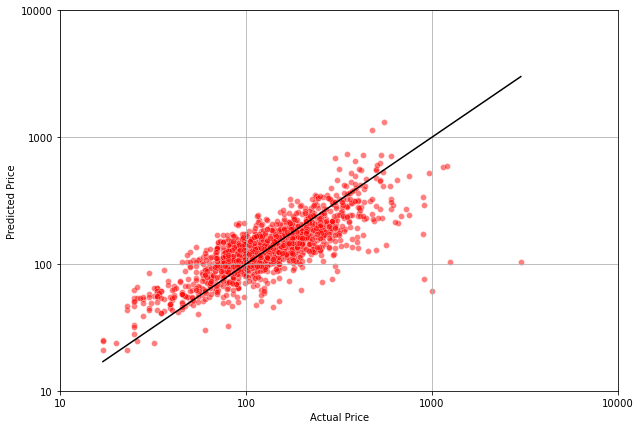

In [122]:
# plotting the results
# comparing price predictions with the test values
x_values = scaler_target.inverse_transform(y_test)
y_values = scaler_target.inverse_transform(predictions)
min_value = min(min(x_values), min(y_values))
max_value = max(max(x_values), max(y_values))

fig, ax = plt.subplots(figsize=(10, 7))

plt.plot([min_value,max_value],[min_value,max_value], color='black')
sns.scatterplot(x=x_values[:,0], y=y_values[:,0], alpha=0.5, color='red')
ax.set(xlabel='Actual Price', ylabel='Predicted Price', xlim=(1,4), ylim=(1,4));
xy_range=np.arange(1, 5, step=1)
ax.set_xticks(xy_range)
ax.set_xticklabels(10**xy_range)
ax.set_yticks(xy_range)
ax.set_yticklabels(10**xy_range)
ax.grid(True)

### Evaluating the Model
<br> using sklearn metrics
<br> calculating r2_score, Mean Absolute Error, Mean Square Error, and Root Mean Square Error

In [124]:
from sklearn import metrics

print('Test data')
print('r2_score:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('\n')
print('Training data')
print('r2_score:', metrics.r2_score(y_train, y_train_pred))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Test data
r2_score: 0.6276456908789978
MAE: 0.050398965420112664
MSE: 0.004683428678056664
RMSE: 0.06843558049769626


Training data
r2_score: 0.6489374711549665
MAE: 0.04906912408701775
MSE: 0.004238578843607746
RMSE: 0.06510436885192687


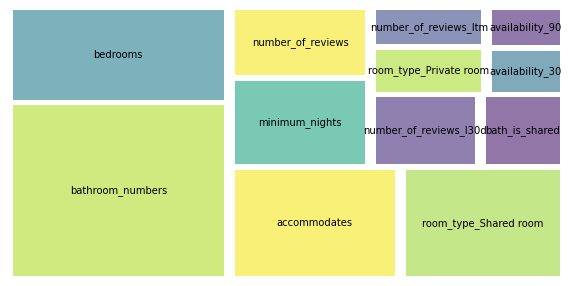

In [173]:
import squarify

plt.figure(figsize=(10,5))

squarify_labels = [x for x in results_df[results_df.p_value<=0.05].index if not x.startswith('neighbourhood')]
squarify_sizes = list(abs(results_df['coef'][squarify_labels]))

squarify.plot(sizes=squarify_sizes, label=squarify_labels, alpha=0.6, pad=True)
plt.axis('off');